#Importing the library files


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px
import itertools
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normal confusion matrix')
  else:
    print('Confusion Matrix without normalization')
  print(cm)

  plt.imshow(cm,interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

In [ ]:
df = pd.read_csv('/content/CreditScore.csv', sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.shape

(4521, 17)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df['marital'].value_counts()

,count
marital,
married,2797
single,1196
divorced,528


<Axes: xlabel='marital', ylabel='count'>

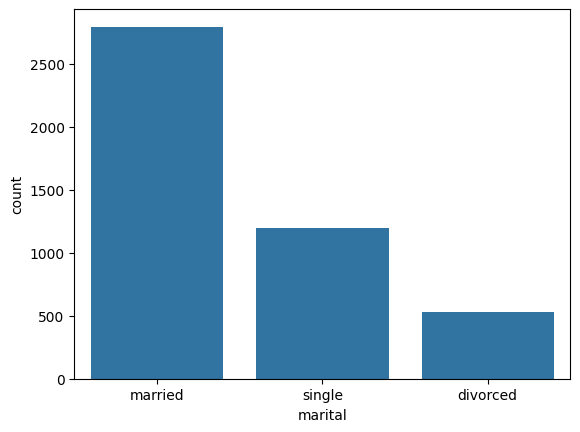

In [ ]:
sns.countplot(x='marital',data=df)

<Axes: xlabel='housing', ylabel='count'>

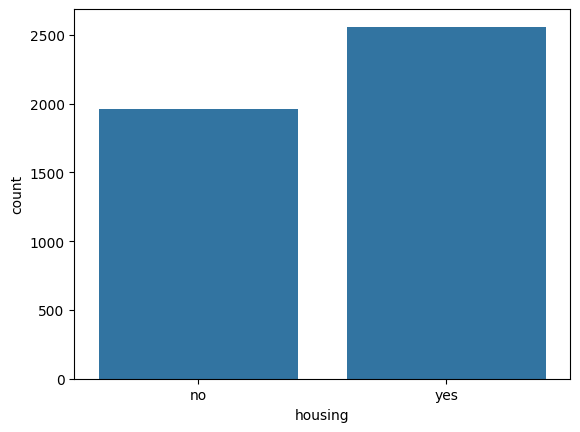

In [ ]:
sns.countplot(x='housing',data=df)

In [ ]:
categories_1st=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
LE=LabelEncoder()
for i in categories_1st:
    df[i]=LE.fit_transform(df[i])

In [ ]:
df.rename(columns={"y": "loan_approval"}, inplace=True)

In [ ]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,loan_approval
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


In [ ]:
x = df.iloc[:,:-1]
print(x)

      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      30    4        1          2        0     1476        1     1        2   
4      59    1        1          1        0        0        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33    7        1          1        0     -333        1     0        0   
4517   57    6        1          2        1    -3313        1     1        2   
4518   57    9        1          1        0      295        0     0        0   
4519   28    1        1          1        0     1137        0     0        0   
4520   44    2        2          2        0     1136        1     1        0   

      day  month  duration  campaign  p

In [ ]:
y = df.iloc[:,-1]
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int64


In [ ]:
print(x.shape, y.shape)

(4521, 16) (4521,)


In [ ]:
print("Before oversampling:")
print(y.value_counts())
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)
print("After oversampling:")
print(y.value_counts())

Before oversampling:
loan_approval
0    4000
1     521
Name: count, dtype: int64
After oversampling:
loan_approval
0    4000
1    4000
Name: count, dtype: int64


In [ ]:
ms=MinMaxScaler()
x=ms.fit_transform(x)
print(x)

[[0.16176471 0.90909091 0.5        ... 0.         0.         1.        ]
 [0.20588235 0.63636364 0.5        ... 0.38990826 0.16       0.        ]
 [0.23529412 0.36363636 1.         ... 0.37958716 0.04       0.        ]
 ...
 [0.11764706 0.81818182 1.         ... 0.         0.         1.        ]
 [0.85294118 0.45454545 0.5        ... 0.10665138 0.08       0.66666667]
 [0.32352941 0.81818182 0.5        ... 0.         0.         1.        ]]


In [ ]:
#Splitting Data for Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=4)
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (7200, 16) (7200,)
Test set: (800, 16) (800,)


#Classification Phase

#Classifying using Logistic Regression

In [ ]:
LR = LogisticRegression(C= 0.011, solver='liblinear')
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print(y_pred)

[0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0
 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 1 0 1 1 

In [ ]:
LR_score=accuracy_score(y_test, y_pred)
LR_F1_SCORE=f1_score(y_test, y_pred, average='weighted')
print('F1_score:%.4f'%LR_F1_SCORE)
print('Accuracy:%f'% accuracy_score(y_test, y_pred))

F1_score:0.6856
Accuracy:0.686250


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67       361
           1       0.73      0.68      0.70       439

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



Confusion Matrix without normalization
[[250 140]
 [111 299]]


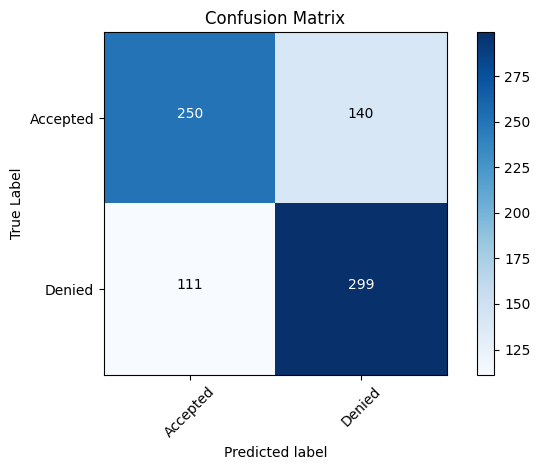

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Accepted', 'Denied']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

#Classifying using SVM

In [ ]:
clf = svm.SVC(C=10, gamma = 1, kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=10, gamma=1)

In [ ]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 

In [ ]:
SVM_score=accuracy_score(y_test, y_pred)
SVM_F1_SCORE=f1_score(y_test, y_pred, average='weighted')
print('F1_score:%.4f'%SVM_F1_SCORE)
print('Accuracy:%f'% accuracy_score(y_test, y_pred))

F1_score:0.8911
Accuracy:0.891250


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       373
           1       0.91      0.88      0.90       427

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



Confusion Matrix without normalization
[[338  52]
 [ 35 375]]


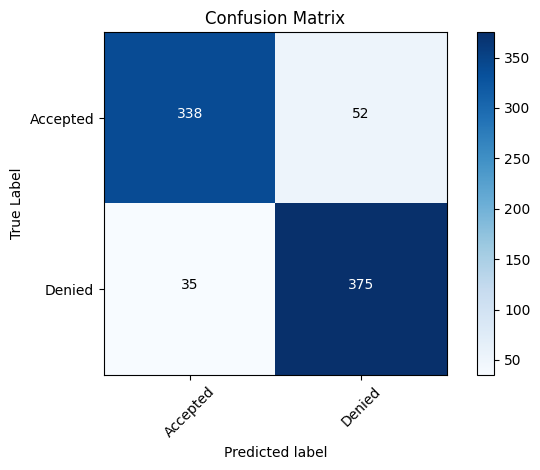

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Accepted', 'Denied']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

#Classifying Using KNN

In [ ]:
x_train_norm = preprocessing.StandardScaler().fit(x_train).transform(x_train)
x_train_norm[0:5]

array([[ 0.62944643,  0.16615784,  1.34104522, -1.71866417, -0.1334605 ,
         8.64505749, -0.99750312, -0.37940297,  1.80343232,  0.15803171,
         0.17288048, -0.84425291, -0.58516182, -0.47994673, -0.42135095,
         0.53213499],
       [-0.65302974,  1.42380459, -0.2559653 , -0.36375538, -0.1334605 ,
        -0.53315483,  1.00250313, -0.37940297, -0.61615451,  1.61663014,
        -1.40713914, -0.78066484,  0.5375505 , -0.47994673, -0.42135095,
         0.53213499],
       [-0.31103609, -0.77707722, -0.2559653 , -0.36375538, -0.1334605 ,
        -0.3223943 ,  1.00250313,  2.63571999, -0.61615451,  1.0088808 ,
        -0.14312344,  3.1733572 ,  8.02229934, -0.47994673, -0.42135095,
         0.53213499],
       [-0.22553768,  1.42380459, -0.2559653 ,  2.34606222, -0.1334605 ,
        -0.23496245, -0.99750312, -0.37940297,  1.80343232,  1.73818001,
         0.80488833,  1.26860536, -0.21092438, -0.47994673, -0.42135095,
         0.53213499],
       [-0.3965345 , -0.77707722,  1

In [ ]:
k = 3
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [ ]:
x_test_norm = preprocessing.StandardScaler().fit(x_test).transform(x_test)
x_test_norm[0:5]

array([[ 0.16086985, -1.10309361, -1.85938244, -1.79711492, -0.14734777,
        -0.54985251,  0.99750312, -0.37363236,  1.82541592, -0.89260017,
         0.82687999, -0.80859988, -0.54569221, -0.48002452, -0.3758757 ,
         0.50748987],
       [ 0.33716557, -1.10309361,  1.3021605 , -0.39858191, -0.14734777,
        -0.56905241,  0.99750312, -0.37363236, -0.60442224,  1.17896337,
        -1.62995935,  2.94984523, -0.54569221,  1.4808143 ,  1.63214139,
        -2.4704458 ],
       [ 2.01197494,  0.11832492, -0.27861097, -0.39858191, -0.14734777,
         0.0476956 , -1.00250313, -0.37363236,  0.61049684,  1.5445334 ,
        -0.09443476, -0.25798219,  0.16704863, -0.48002452, -0.3758757 ,
         0.50748987],
       [ 0.42531343,  0.72903419, -0.27861097, -0.39858191, -0.14734777,
        -0.56748508, -1.00250313, -0.37363236, -0.60442224,  1.66639008,
        -1.62995935, -0.34838211, -0.54569221,  2.18183958,  2.13414566,
        -1.47780058],
       [ 1.21864419,  0.11832492, -0

In [ ]:
y_pred = neigh.predict(x_test_norm)
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [ ]:
knn_score=accuracy_score(y_test, y_pred)
kNN_F1_SCORE=f1_score(y_test, y_pred, average='weighted')
print('F1_score:%.4f'%kNN_F1_SCORE)
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

F1_score:0.9309
Test set Accuracy:  0.93125


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       341
           1       0.99      0.89      0.94       459

    accuracy                           0.93       800
   macro avg       0.93      0.94      0.93       800
weighted avg       0.94      0.93      0.93       800



Confusion Matrix without normalization
[[338  52]
 [  3 407]]


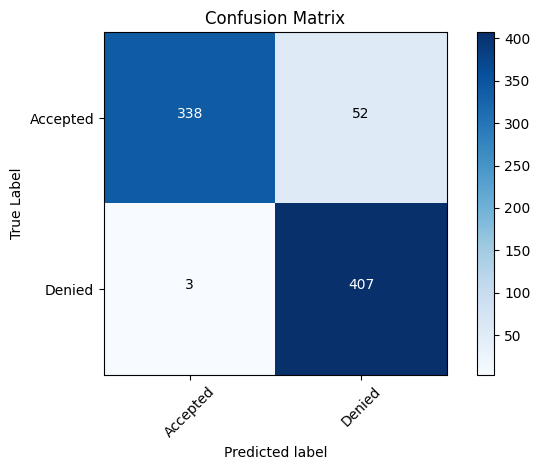

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Accepted', 'Denied']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

#Classifying Using Random Forest

In [ ]:
forest = RandomForestClassifier(criterion="entropy", max_depth = None, min_samples_leaf=1, min_samples_split=4)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=4)

In [ ]:
y_pred = forest.predict(x_test)

rand_score=accuracy_score(y_test, y_pred)
rand_F1_SCORE=f1_score(y_test, y_pred, average='weighted')
print('F1_score:%.4f'%rand_F1_SCORE)


F1_score:0.9800


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       374
           1       1.00      0.96      0.98       426

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



Confusion Matrix without normalization
[[374  16]
 [  0 410]]


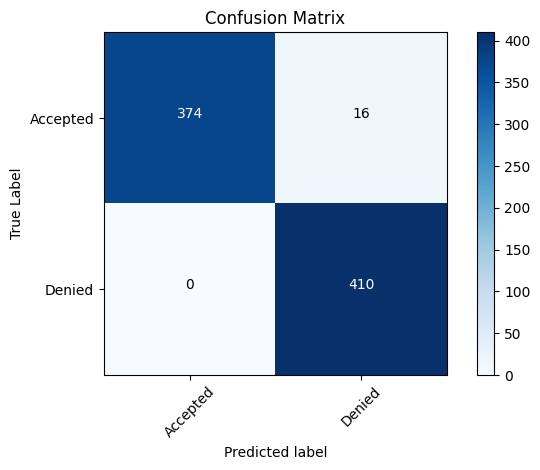

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Accepted', 'Denied']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

In [ ]:
Accuracy=[LR_score*100,knn_score*100,SVM_score*100,round(rand_score*100)]
Algorithm=['Logistic Regression','SVM','KNN','Random Forest']
f1_score=[LR_F1_SCORE*100,kNN_F1_SCORE*100,SVM_F1_SCORE*100,rand_F1_SCORE*100]
data={'Algorithm':Algorithm,'Accuracy':Accuracy,'F1_SCORE':f1_score}
Report=pd.DataFrame(data=data)
Report

,Algorithm,Accuracy,F1_SCORE
0,Logistic Regression,68.625,68.555075
1,SVM,93.125,93.088408
2,KNN,89.125,89.114289
3,Random Forest,98.000,97.998196
